In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
from matplotlib.ticker import ScalarFormatter
import mplfinance as mpf
from PIL import Image
from tqdm import tqdm

In [2]:
df_img_list = pd.read_csv('train_image_level.csv')

In [3]:
df_img_list.head(2)

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed


In [4]:
df_img_list['img_path'] = 'train/' + df_img_list['id'].replace('_image', '', regex=True) + '.jpg'
df_img_list['bin_label'] = df_img_list['boxes'].notna().astype(int)

In [5]:
df_img_list.head(2)

,id,boxes,label,StudyInstanceUID,img_path,bin_label
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,train/000a312787f2.jpg,1
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,train/000c3a3f293f.jpg,0


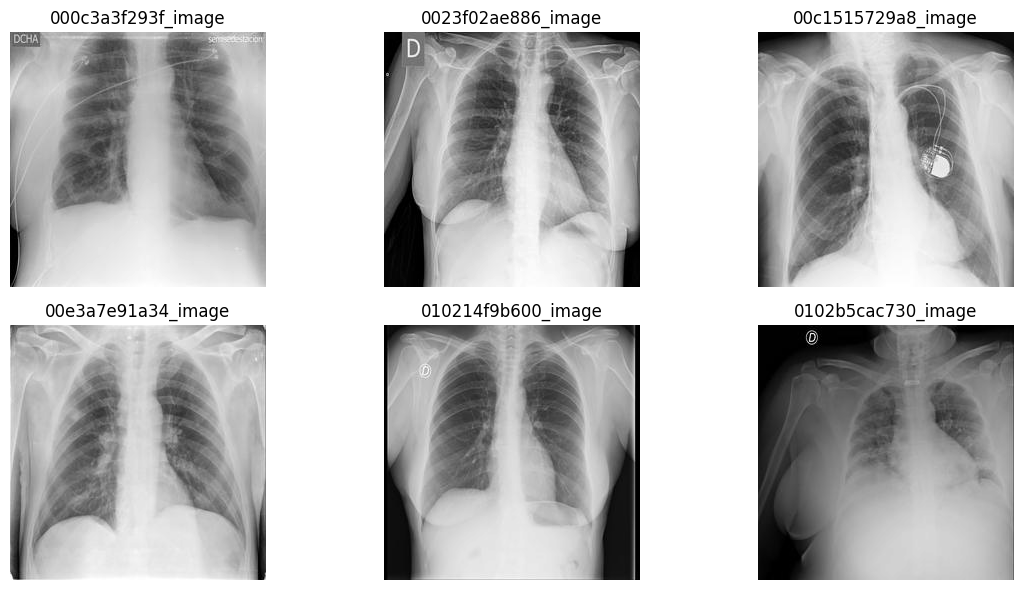

In [6]:
df_temp_list = df_img_list[df_img_list['bin_label'] == 0].head(6)

plt.figure(figsize=(12, 6))

for i, path in enumerate(df_temp_list['img_path']):
    img = Image.open(path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{df_temp_list['id'].iloc[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

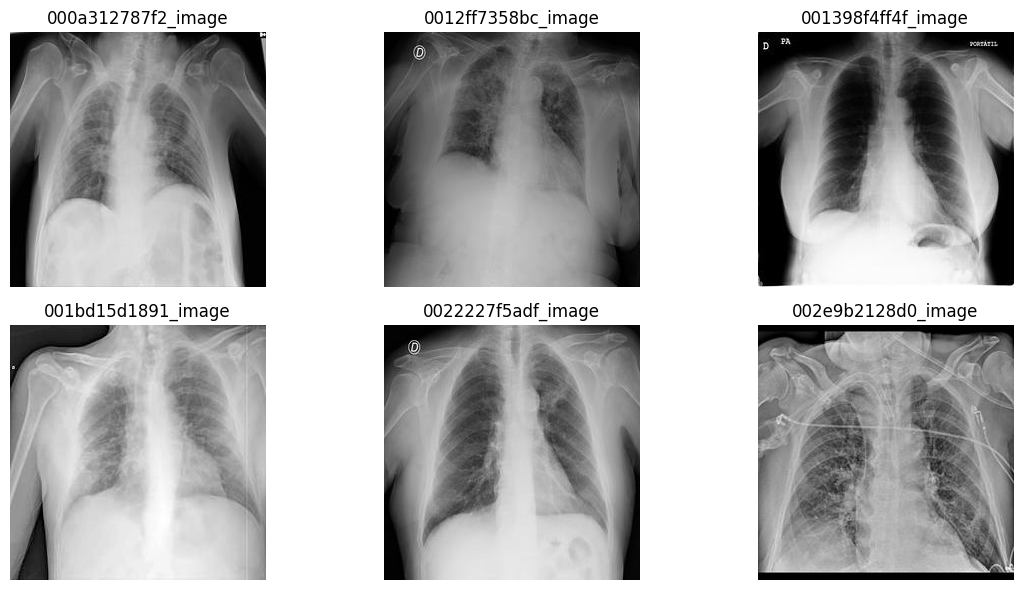

In [7]:
df_temp_list = df_img_list[df_img_list['bin_label'] == 1].head(6)

plt.figure(figsize=(12, 6))

for i, path in enumerate(df_temp_list['img_path']):
    img = Image.open(path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{df_temp_list['id'].iloc[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
def add_pixel_cols(df_input, threshold=0):
    gray_pixels_list = []

    stat_cols = ['Mean', 'Var', 'Q1', 'Median', 'Q3', 'Min', 'Max', 'Count', 'Contrast', 'Range']
    gray_stats = {stat: [] for stat in stat_cols}

    for path in tqdm(df_input['img_path']):
        img_rgb = Image.open(path).convert('RGB')

        gray = np.array(img_rgb.convert('L')).flatten().astype(np.uint8)

        gray_pixels_list.append(gray)

        def compute_stats(arr):
            return {
                'Mean': arr.mean(),
                'Var': arr.var(),
                'Q1': np.percentile(arr, 25),
                'Median': np.median(arr),
                'Q3': np.percentile(arr, 75),
                'Min': arr.min(),
                'Max': arr.max(),
                'Count': np.sum(arr > threshold),
                'Contrast': np.std(arr),
                'Range': arr.max() - arr.min()
            }

        for stat, val in compute_stats(gray).items():
            gray_stats[stat].append(val)

    # Store pixel arrays
    df_input['Gray_Pixels'] = gray_pixels_list

    # Store computed stats
    for stat in stat_cols:
        df_input[f'Gray_{stat}'] = gray_stats[stat]

    return df_input


In [9]:
df = add_pixel_cols(df_img_list)

100%|██████████| 6334/6334 [00:10<00:00, 587.69it/s]


In [10]:
df

,id,boxes,label,StudyInstanceUID,img_path,bin_label,Gray_Pixels,Gray_Mean,Gray_Var,Gray_Q1,Gray_Median,Gray_Q3,Gray_Min,Gray_Max,Gray_Count,Gray_Contrast,Gray_Range
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,train/000a312787f2.jpg,1,"[196, 194, 192, 193, 194, 191, 183, 176, 168, ...",128.671219,4594.478588,87.0,135.0,192.0,0,255,65021,67.782583,255
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,train/000c3a3f293f.jpg,0,"[95, 109, 115, 112, 103, 107, 109, 112, 113, 1...",161.156876,2483.795321,119.0,173.0,199.0,0,250,65357,49.837690,250
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,train/0012ff7358bc.jpg,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",106.971786,2607.826856,72.0,106.0,148.0,0,255,64993,51.066886,255
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,train/001398f4ff4f.jpg,1,"[73, 8, 0, 9, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,...",120.719391,7195.341577,38.0,127.0,195.0,0,255,58162,84.825359,255
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,train/001bd15d1891.jpg,1,"[20, 21, 22, 22, 23, 23, 22, 22, 21, 21, 21, 2...",100.022202,849.666148,86.0,106.0,121.0,0,146,65476,29.149033,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06,train/ffcc6edd9445.jpg,0,"[0, 1, 9, 19, 25, 27, 25, 22, 11, 11, 11, 10, ...",132.930649,4435.089474,79.0,133.0,196.0,0,247,64573,66.596467,247
6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e,train/ffd91a2c4ca0.jpg,0,"[29, 36, 41, 41, 44, 48, 51, 50, 58, 59, 60, 6...",105.768494,510.966882,92.0,107.0,121.0,0,149,65488,22.604577,149
6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,train/ffd9b6cf2961.jpg,1,"[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",111.360992,3814.473566,61.0,119.0,160.0,0,250,64197,61.761425,250
6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,train/ffdc682f7680.jpg,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, ...",146.238953,3451.235687,121.0,171.0,186.0,0,255,60860,58.747219,255


In [11]:
df['label_name'] = df['bin_label'].map({0: 'Không', 1: 'Có phát hiện vùng lạ'})

In [30]:
df[['id', 'Gray_Mean', 'Gray_Contrast', 'Gray_Range', 'bin_label']].head(5)

,id,Gray_Mean,Gray_Contrast,Gray_Range,bin_label
0,000a312787f2_image,128.671219,67.782583,255,1
1,000c3a3f293f_image,161.156876,49.837690,250,0
2,0012ff7358bc_image,106.971786,51.066886,255,1
3,001398f4ff4f_image,120.719391,84.825359,255,1
4,001bd15d1891_image,100.022202,29.149033,146,1


In [31]:
summary_stats = {
    " ": [
        "Mean",
        "Min",
        "25th Percentile",
        "Median",
        "75th Percentile",
        "Max",
        "Mode",
        "Variance",
        "Standard Deviation",
        "Coefficient of Variation",
        "IQR"
    ]
}

quantitative_cols = [
    'Gray_Mean', 'Gray_Contrast', 'Gray_Range'
]

def create_summary_df(df, quantitative_cols):
    for col in quantitative_cols:
        data = df[col]
        mean_val = data.mean()
        std_val = data.std()
        mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
        variance_val = data.var()
        cv_val = std_val / mean_val if mean_val != 0 else np.nan

        summary_stats[col] = [
            mean_val,
            data.min(),
            data.quantile(0.25),
            data.median(),
            data.quantile(0.75),
            data.max(),
            mode_val,
            variance_val,
            std_val,
            cv_val,
            data.quantile(0.75) - data.quantile(0.25)
        ]

    formatted_summary_df = pd.DataFrame(summary_stats).copy()

    for col in formatted_summary_df.columns[1:]:  # Skip "Thông số thống kê"
        formatted_summary_df[col] = formatted_summary_df[col].apply(lambda x: f'{x:,.4f}' if isinstance(x, (int, float)) else x)

    return formatted_summary_df

formatted_summary_df = create_summary_df(df, quantitative_cols)
formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)
formatted_summary_df

C:\Users\PC\AppData\Local\Temp\ipykernel_33644\4188592620.py:52: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_summary_df = formatted_summary_df.applymap(lambda x: x.rstrip('0').rstrip('.') if isinstance(x, str) else x)


,,Gray_Mean,Gray_Contrast,Gray_Range
0,Mean,133.4941,53.1815,235.6334
1,Min,32.6093,5.5864,29
2,25th Percentile,114.8975,44.0441,227
3,Median,137.8155,53.8242,245
4,75th Percentile,152.3086,62.4082,255
5,Max,246.1806,101.9465,255
6,Mode,132.3795,61.919,255
7,Variance,753.9617,193.82,692.5032
8,Standard Deviation,27.4584,13.9219,26.3155
9,Coefficient of Variation,0.2057,0.2618,0.1117


In [32]:
print(formatted_summary_df.to_latex(index=False, escape=False, header=True, float_format='%.4f').replace('_', '\\_'))

\begin{tabular}{llll}
\toprule
  & Gray\_Mean & Gray\_Contrast & Gray\_Range \\
\midrule
Mean & 133.4941 & 53.1815 & 235.6334 \\
Min & 32.6093 & 5.5864 & 29 \\
25th Percentile & 114.8975 & 44.0441 & 227 \\
Median & 137.8155 & 53.8242 & 245 \\
75th Percentile & 152.3086 & 62.4082 & 255 \\
Max & 246.1806 & 101.9465 & 255 \\
Mode & 132.3795 & 61.919 & 255 \\
Variance & 753.9617 & 193.82 & 692.5032 \\
Standard Deviation & 27.4584 & 13.9219 & 26.3155 \\
Coefficient of Variation & 0.2057 & 0.2618 & 0.1117 \\
IQR & 37.411 & 18.3641 & 28 \\
\bottomrule
\end{tabular}



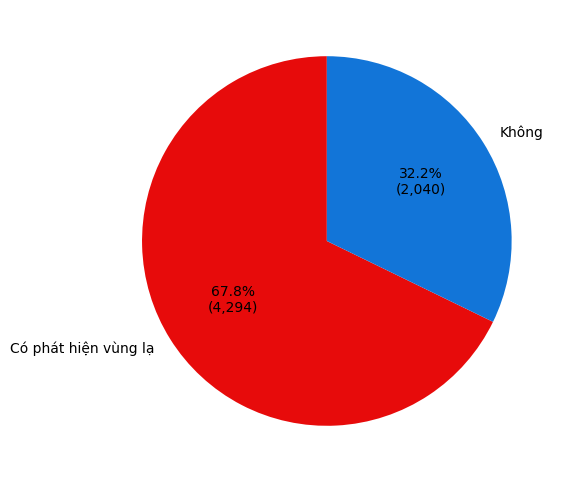

In [12]:
plt.figure(figsize=(10, 6))
counts = df['label_name'].value_counts()

def autopct_format(pct):
    total = sum(counts)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count:,})'

plt.pie(
    counts,
    labels=counts.index,
    autopct=autopct_format,
    startangle=90,
    colors=["#e70b0b", "#1275d8"]
)

plt.show()


In [13]:
df_yes = df[df['bin_label'] == 1]
df_no = df[df['bin_label'] == 0]

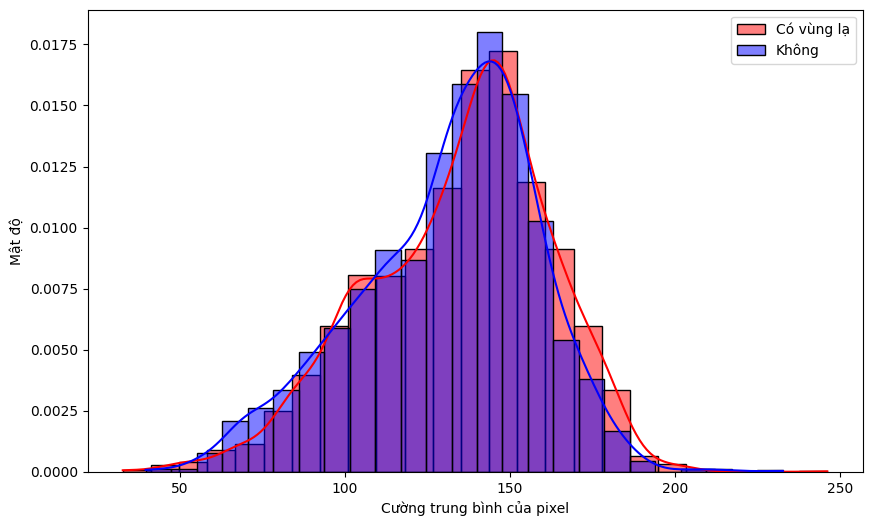

In [ ]:
# plot mean gray pixels
plt.figure(figsize=(10, 6))
sns.histplot(df_yes['Gray_Mean'], color='red', label='Có vùng lạ', kde=True, stat='density', bins=25)
sns.histplot(df_no['Gray_Mean'], color='blue', label='Không', kde=True, stat='density', bins=25)

plt.xlabel('Cường trung bình của pixel')
plt.ylabel('Mật độ')
plt.legend()
plt.show()

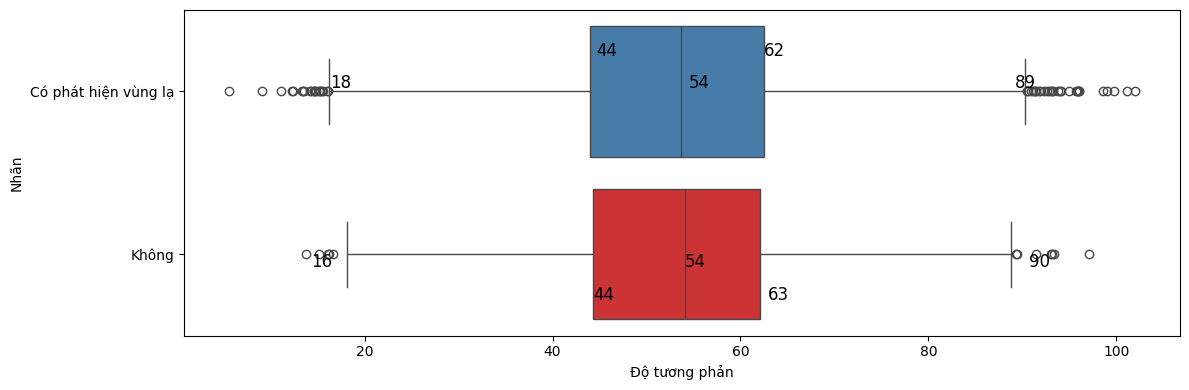

In [25]:
grouped = df.groupby('label_name')['Gray_Contrast']
quartiles = grouped.quantile([0.25, 0.5, 0.75]).unstack()
quartiles.columns = ['Q1', 'Median', 'Q3']
quartiles['IQR'] = quartiles['Q3'] - quartiles['Q1']

whisk = {}
for lvl, row in quartiles.iterrows():
    data = df.loc[df['label_name']==lvl, 'Gray_Contrast']
    lower_bound = row['Q1'] - 1.5 * row['IQR']
    upper_bound = row['Q3'] + 1.5 * row['IQR']
    lower_whisk = data[data >= lower_bound].min()
    upper_whisk = data[data <= upper_bound].max()
    whisk[lvl] = (lower_whisk, upper_whisk)

fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(
    data=df,
    y='label_name',
    x='Gray_Contrast',
    hue='label_name',
    palette='Set1',
    hue_order=['Không', 'Có phát hiện vùng lạ'],
    orient='h',
    ax=ax
)

ax.set_ylabel('Nhãn')
ax.set_xlabel('Độ tương phản')

hue_levels = ['Không', 'Có phát hiện vùng lạ']
y_offsets = [-0.05, 0.05]   

for i, lvl in enumerate(hue_levels):
    q1, med, q3 = quartiles.loc[lvl, ['Q1','Median','Q3']]
    wlow, whigh = whisk[lvl]
    y = i

    ax.text(q1 + 0.4,  y + y_offsets[i] * 5, f"{q1:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})
    ax.text(med + 0.4, y + y_offsets[i], f"{med:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})
    ax.text(q3 + 0.4,  y + y_offsets[i]* 5, f"{q3:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})

    ax.text(wlow + 0.4,  y + y_offsets[i], f"{wlow:.0f}",
            va='center', ha='right', fontdict={'fontsize': 12})
    ax.text(whigh+ 0.4 , y + y_offsets[i], f"{whigh:.0f}",
            va='center', ha='left', fontdict={'fontsize': 12})

plt.tight_layout()
plt.show()


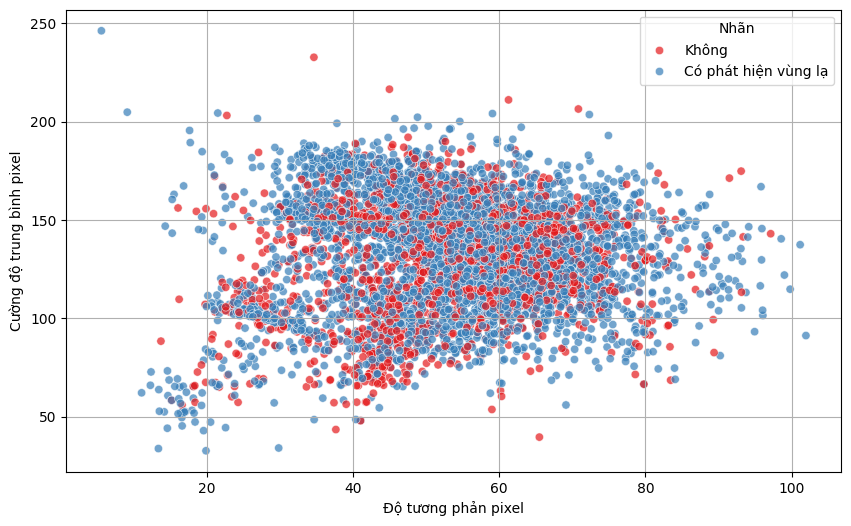

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Gray_Contrast',
    y='Gray_Mean',
    hue='label_name',
    palette='Set1',
    hue_order=['Không', 'Có phát hiện vùng lạ'],
    alpha=0.7
)
plt.xlabel('Độ tương phản pixel')
plt.ylabel('Cường độ trung bình pixel')
plt.legend(title='Nhãn', loc='upper right')
plt.grid(True)
plt.show()
